
# K-Means Clustering

[(6, 7), (17, 20), (4, 21), (5, 8), (20, 25), (6, 16), (8, 7), (15, 22), (6, 21), (9, 11), (19, 26), (5, 17), (9, 11), (18, 21), (6, 20), (8, 6), (19, 21), (7, 16), (5, 10), (17, 20), (7, 16), (8, 7), (19, 22), (4, 17), (10, 10), (21, 23), (6, 17), (11, 9), (16, 22), (1, 15)]


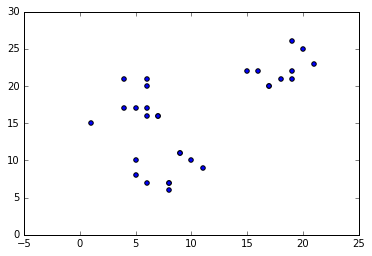

In [2]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import math

cents = [(5,5), (15,20), (1,15)]
points = []
for i in range(10):
    for c in cents:
        points.append(tuple([c[0]+random.randrange(7),c[1]+random.randrange(7)]))

print(points)

plt.scatter([x[0] for x in points],[x[1] for x in points])
plt.show()

In [3]:
k = 3

def chooseCentroids(k,points):
    centroids = random.sample(points,k)
    print("Centroids:", centroids)

    cluster_keeper = {}
    for c in centroids:
        cluster_keeper[c] = []
    return cluster_keeper

def edist(p1,p2):
    tot = 0
    for i in range(len(p1)):
        diff = (p1[i]-p2[i])**2
        tot = tot + diff
    return math.sqrt(tot)

def createClusters(k, points, ck, it):
    for i in range(it):
        for p in points:
            minC = None
            minD = 99999
            for c in ck:
                dist = edist(c,p)
                if dist < minD:
                    minC = c
                    minD = dist
            ck[minC].append(p)
        newck = {}
        for k in ck:
            x = sum([x[0] for x in ck[k]])/len(ck[k])
            y = sum([x[1] for x in ck[k]])/len(ck[k])
            newck[(x,y)] = []
        if i < it-1:
            ck = newck

    return ck


Centroids: [(18, 21), (8, 7), (19, 26)]
{(19.75, 24.0): [(20, 25), (19, 26), (19, 22), (21, 23)], (17.0, 21.0): [(17, 20), (15, 22), (18, 21), (19, 21), (17, 20), (16, 22)], (6.55, 13.1): [(6, 7), (4, 21), (5, 8), (6, 16), (8, 7), (6, 21), (9, 11), (5, 17), (9, 11), (6, 20), (8, 6), (7, 16), (5, 10), (7, 16), (8, 7), (4, 17), (10, 10), (6, 17), (11, 9), (1, 15)]}


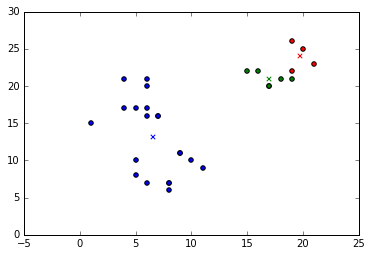

In [4]:
ck = createClusters(k,points,chooseCentroids(k,points),14)
print(ck)
clrs = 'rgbyp'

for i,k in enumerate(ck):
    plt.scatter(k[0],k[1],c=clrs[i],marker='x')
    plt.scatter([x[0] for x in ck[k]],[x[1] for x in ck[k]],c=clrs[i],marker='o')

plt.show()


## Or from SciKit Learn

array([1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2,
       0, 1, 2, 0, 1, 2, 0], dtype=int32)

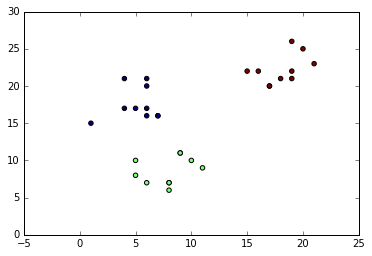

In [5]:
from sklearn.cluster import KMeans
kmm = KMeans(3,n_init=30)
kmm.fit(points)
kmm_label = kmm.predict(points)
plt.scatter([x[0] for x in points], [x[1] for x in points], c=kmm_label)
kmm_label

## Two projects

1.  Try the hand coded algorithm on the iris data.  Compare and figure out how well it clusters the different varieties of iris into the correct cluster. (We can use SKLearn, too.)
2.  In image processing

    1.  Choose an image
    2.  Apply KMeans clustering to the color tuples
    3.  display the original image
    4.  create a new image using the centroids to stand in for the colors you chose.


### Iris

In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
features = [tuple(x) for x in iris.data]

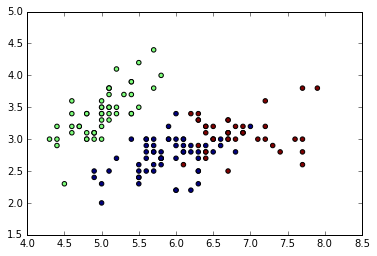

In [7]:
### Using SKLearn

k = 3
iterations = 30

kmc = KMeans(n_clusters = k, n_init = iterations)
kmc.fit(features)

labels = kmc.predict(features)

plt.scatter([x[0] for x in features], [x[1] for x in features], c=labels)

In [8]:
print("Features:")
print(features)
print()
print("Labels:")
print(labels)

Features:
[(5.0999999999999996, 3.5, 1.3999999999999999, 0.20000000000000001), (4.9000000000000004, 3.0, 1.3999999999999999, 0.20000000000000001), (4.7000000000000002, 3.2000000000000002, 1.3, 0.20000000000000001), (4.5999999999999996, 3.1000000000000001, 1.5, 0.20000000000000001), (5.0, 3.6000000000000001, 1.3999999999999999, 0.20000000000000001), (5.4000000000000004, 3.8999999999999999, 1.7, 0.40000000000000002), (4.5999999999999996, 3.3999999999999999, 1.3999999999999999, 0.29999999999999999), (5.0, 3.3999999999999999, 1.5, 0.20000000000000001), (4.4000000000000004, 2.8999999999999999, 1.3999999999999999, 0.20000000000000001), (4.9000000000000004, 3.1000000000000001, 1.5, 0.10000000000000001), (5.4000000000000004, 3.7000000000000002, 1.5, 0.20000000000000001), (4.7999999999999998, 3.3999999999999999, 1.6000000000000001, 0.20000000000000001), (4.7999999999999998, 3.0, 1.3999999999999999, 0.10000000000000001), (4.2999999999999998, 3.0, 1.1000000000000001, 0.10000000000000001), (5.7999

Comparing the points to the labels, we see that 2 is red, 1 is green, and 0 is blue.

In [9]:
from sklearn.metrics import classification_report

# This needs to be changed each time the data is clustered.
# Key-value pairs are given as follows:
#    Key   = Clustering label
#    Value = The corresponding label for the original target. 0 is setosa, 1 is virginica, 2 is versicolor
convert = {2: 0, 1: 1, 0: 2}

# Fix "labels" to use the numbering system of "iris.target"
new_labels = [convert[x] for x in labels]

print(classification_report(iris.target, new_labels))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00        50
          2       0.23      0.28      0.25        50

avg / total       0.08      0.09      0.08       150



It's pretty accurate.

### Image Processing

In [20]:
import numpy as np
from PIL import Image

colors = 4

im = Image.open('delta.png')
width, height = im.size
px = np.array(im)

# pixels = list(im.getdata())  Only used for Prof. Miller's implementation

# Reshape into a list of pixel data, in rgba format
px = px.reshape(width * height, 4)

kmc_img = KMeans(n_clusters = colors, n_init = 2, n_jobs = 2)
kmc_img.fit(px)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=2,
    n_jobs=2, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
kmc_img.cluster_centers_

array([[  28.76610492,   31.93158009,   29.62629463,  255.        ],
       [ 182.36653251,  188.68751684,  189.40940344,  255.        ],
       [ 123.69209836,  130.73548599,  123.70028179,  255.        ],
       [  65.53220212,   80.84297668,   75.18409383,  255.        ]])

### New Image

/usr/local/lib/python3.4/dist-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


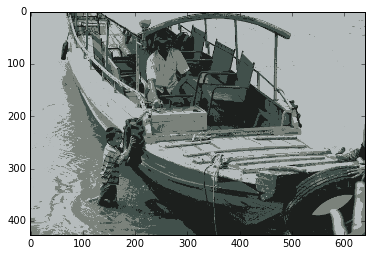

In [22]:
newpx = np.array([kmc_img.cluster_centers_[x] for x in kmc_img.predict(px)])
newpx = newpx.reshape(height, width, 4)
plt.imshow(Image.fromarray(np.uint8(newpx)))

### Original Image

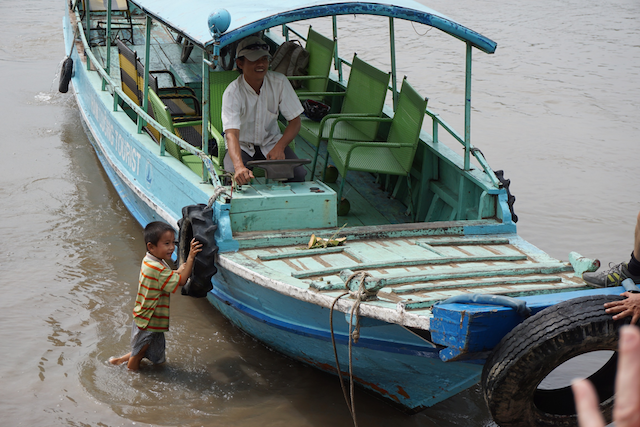

In [13]:
im